# Coding a Computer Vision Neural Network

## Model Handwriting Recognition

In [1]:
# importando o framework tensorflow no python
import tensorflow as tf

In [2]:
# baixando os dados de dígitos escritos a mão
mnist = tf.keras.datasets.mnist

In [3]:
# separando os dados de treinamento e dados de teste
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# visualizando as dimensões dos dados
print('training image shape:', training_images.shape)
print('training label shape:', training_labels.shape)
print('test image shape:', test_images.shape)
print('training label shape:', test_labels.shape)

training image shape: (60000, 28, 28)
training label shape: (60000,)
test image shape: (10000, 28, 28)
training label shape: (10000,)


training label: 5


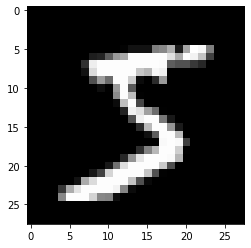

In [11]:
# visualizando um exemplo de formato da imagem
from matplotlib.pyplot import imshow

imshow(training_images[0], cmap = 'gray')
print('training label:', training_labels[0])

In [15]:
# definindo um limite de acurácia para a etapa de treinamento (callback)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [16]:
# criando um objeto da classe myCallback
callbacks = myCallback()

In [6]:
# normalizando os dados de treinamento e dados de teste
training_images = training_images / 255
test_images = test_images / 255

In [7]:
# definindo as camadas da rede neural profunda
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [12]:
# configurando os detalhes de compilação do modelo
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [17]:
# realizando o treinamento do modelo com os dados de treinamento
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3432 - accuracy: 0.8989
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0834 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9913

Reached 99% accuracy so cancelling training!


In [18]:
# testando a acurácia de generalização do modelo como os dados de teste
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9797


[0.06833008676767349, 0.9797000288963318]